In [1]:
import pandas as pd ; import matplotlib.pyplot as plt ; import numpy as npy ; from io import BytesIO

In [2]:
import requests 

In [3]:
spreadsheet_id = '1TZscw1dRTWpg3C2tKbvcw7mUP3hF51JaYv9LAnfUNeM'

In [4]:
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)

In [5]:
r = requests.get(file_name) 

In [6]:
df=pd.read_csv(BytesIO(r.content))

In [7]:
print(df.head(10))

                    Country              City  AQI Value  \
0        Russian Federation        Praskoveya         51   
1                    Brazil  Presidente Dutra         41   
2                     Italy   Priolo Gargallo         66   
3                    Poland         Przasnysz         34   
4                    France          Punaauia         22   
5  United States of America       Punta Gorda         54   
6                   Germany        Puttlingen         62   
7                   Belgium             Puurs         64   
8        Russian Federation        Pyatigorsk         54   
9                     Egypt            Qalyub        142   

                     AQI Category  CO AQI Value CO AQI Category  \
0                        Moderate             1            Good   
1                            Good             1            Good   
2                        Moderate             1            Good   
3                            Good             1            Good   
4   

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


In [9]:
print(df.dtypes)

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object


In [10]:
df.dtypes [df.dtypes == 'int64' ] 

AQI Value          int64
CO AQI Value       int64
Ozone AQI Value    int64
NO2 AQI Value      int64
PM2.5 AQI Value    int64
dtype: object

In [11]:
df.dtypes [df.dtypes == 'object']

Country               object
City                  object
AQI Category          object
CO AQI Category       object
Ozone AQI Category    object
NO2 AQI Category      object
PM2.5 AQI Category    object
dtype: object

In [12]:
print( 'количество строк, и количество столбцов', df.shape)

количество строк, и количество столбцов (23463, 12)


In [13]:

print(df.isna().sum())


Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [14]:
duplicateRows = df[df.duplicated ()]
print(duplicateRows)

Empty DataFrame
Columns: [Country, City, AQI Value, AQI Category, CO AQI Value, CO AQI Category, Ozone AQI Value, Ozone AQI Category, NO2 AQI Value, NO2 AQI Category, PM2.5 AQI Value, PM2.5 AQI Category]
Index: []


In [15]:

df=df.drop_duplicates ()

доминирует тип данных  object, пропущенны 427 позиций в стобце страна и одна позиция в столбце город. 

Axes(0.125,0.11;0.775x0.77)


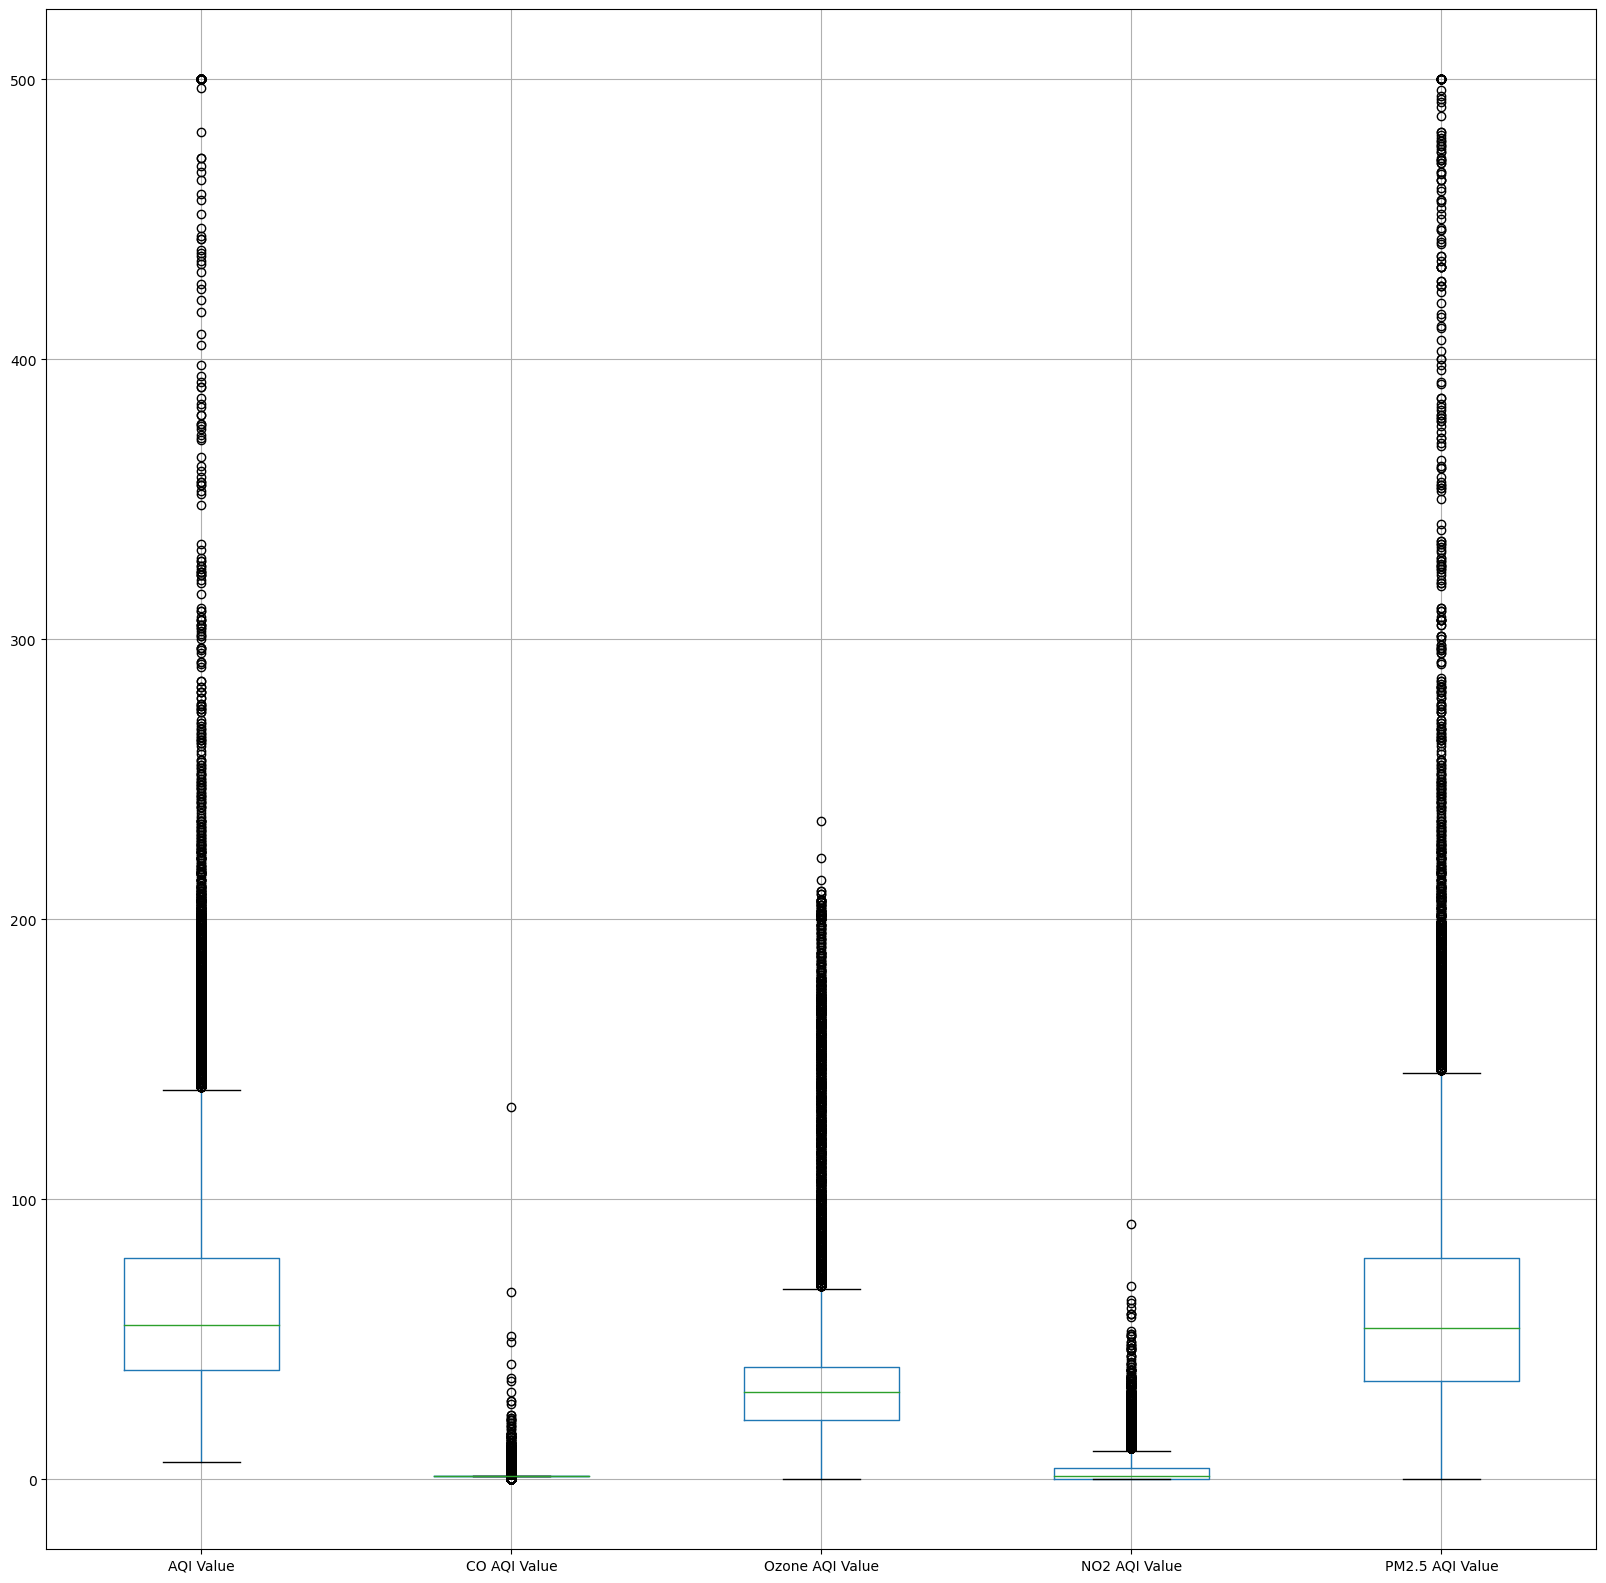

In [16]:
print(df.boxplot(figsize=(20,20)))

In [17]:
df.hist(figsize = (20,20),bins=100,align='right',)

array([[<Axes: title={'center': 'AQI Value'}>,
        <Axes: title={'center': 'CO AQI Value'}>],
       [<Axes: title={'center': 'Ozone AQI Value'}>,
        <Axes: title={'center': 'NO2 AQI Value'}>],
       [<Axes: title={'center': 'PM2.5 AQI Value'}>, <Axes: >]],
      dtype=object)

In [18]:

plt.ylim(0,200)
plt.xlim(0,200) 


(0.0, 200.0)

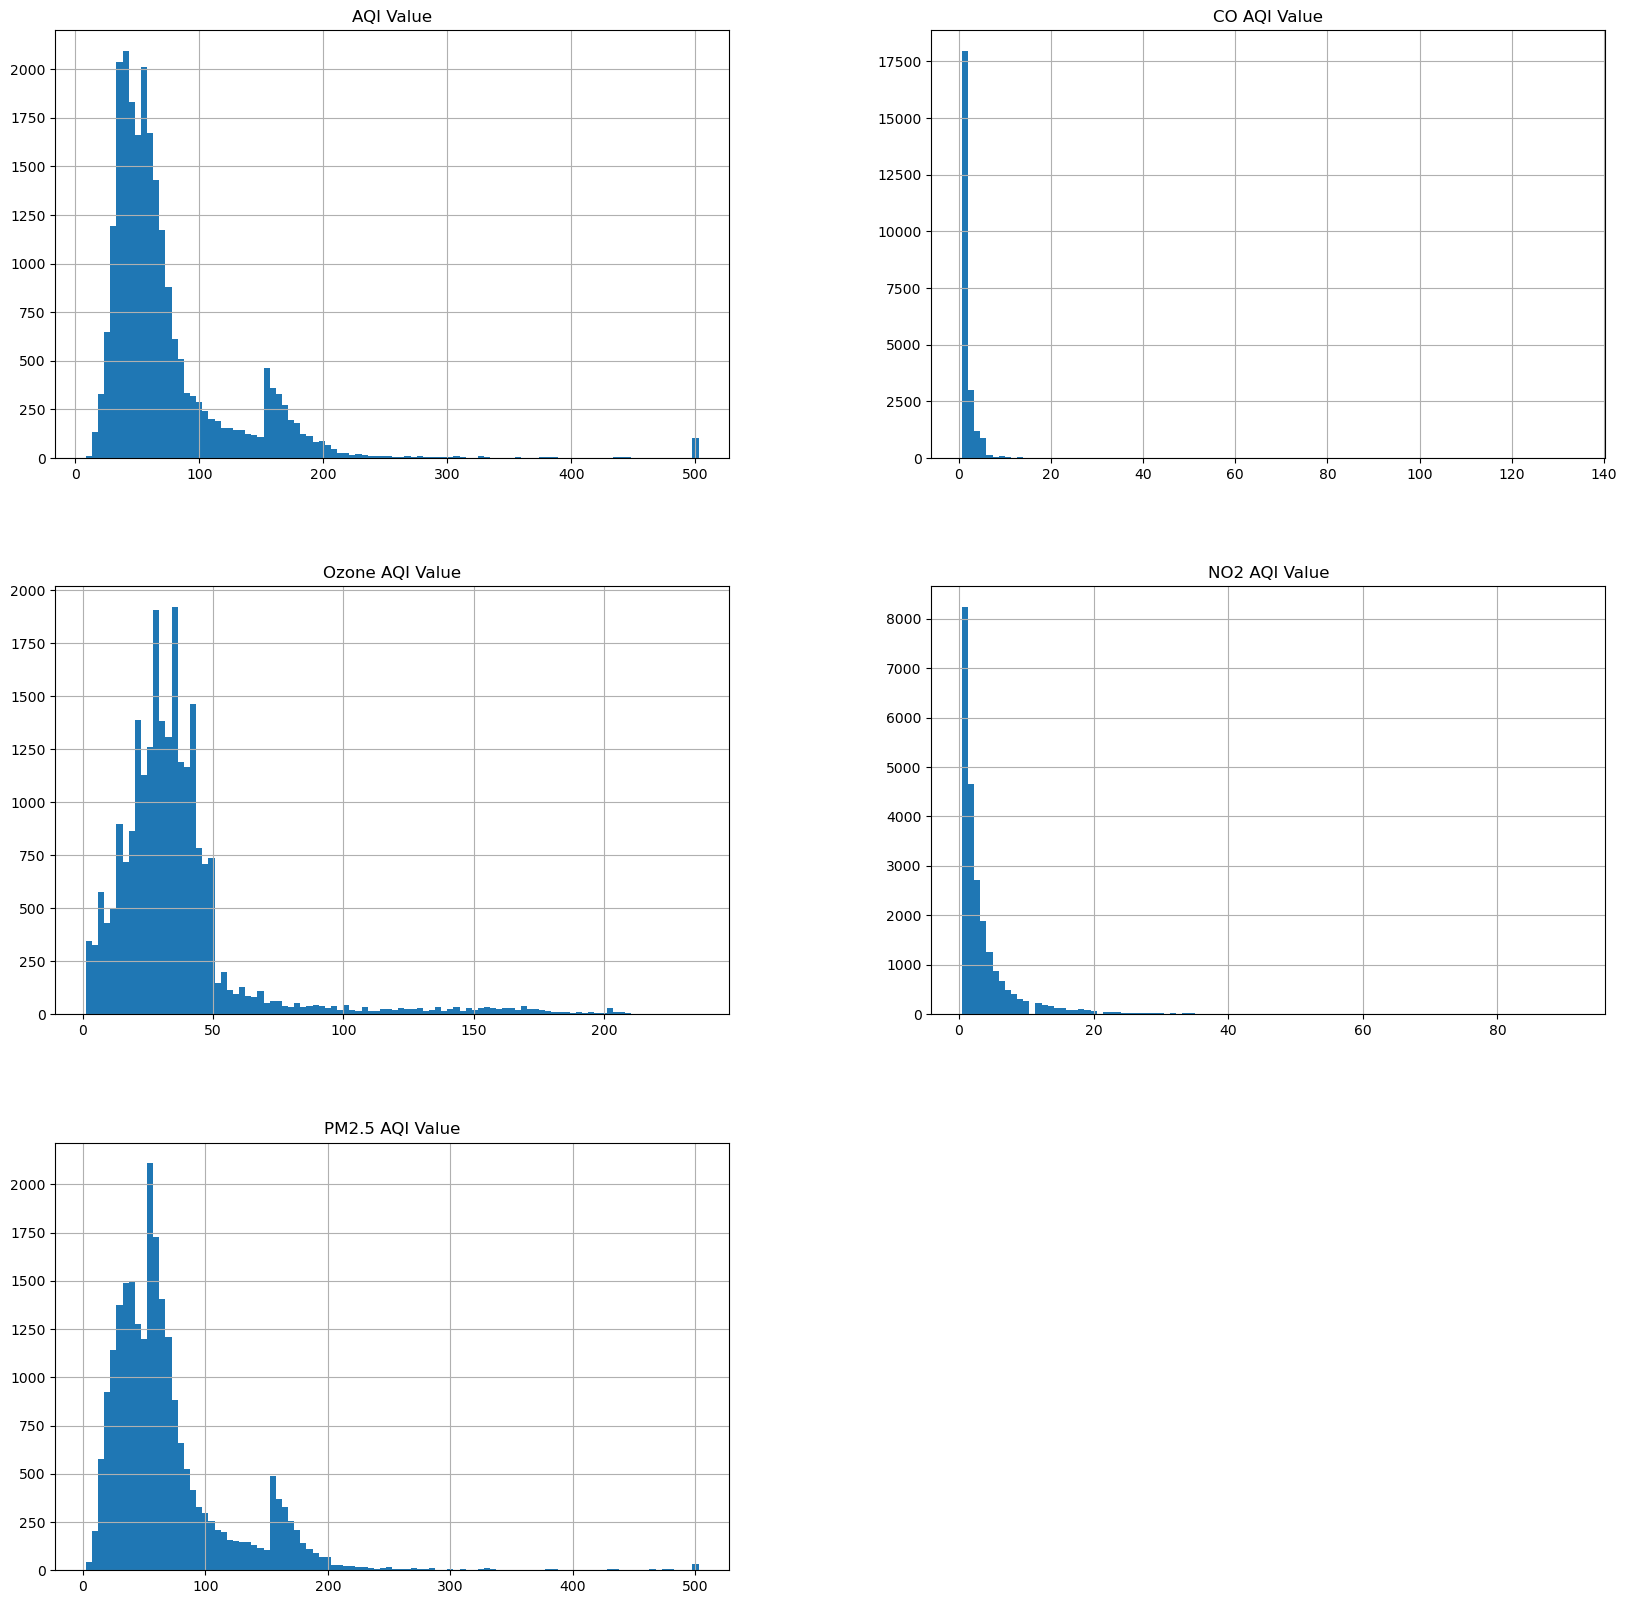

In [19]:

plt.show()


5. C помощью конструкции for values in ….постройте диаграммы размаха и гистограммы для отлагорифмированных значений.* В теле цикла аргументу column присвойте значение values  

In [20]:
intdf = df.select_dtypes(include=['float64', 'int64'])

In [21]:
print(intdf)

       AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0             51             1               36              0   
1             41             1                5              1   
2             66             1               39              2   
3             34             1               34              0   
4             22             0               22              0   
...          ...           ...              ...            ...   
23458        184             3              154              2   
23459         50             1               20              5   
23460         50             1               22              1   
23461         71             1               44              2   
23462         70             1               38              0   

       PM2.5 AQI Value  
0                   51  
1                   41  
2                   66  
3                   20  
4                    6  
...                ...  
23458              184  
23459  

for values in intdf : 
    intdf[values].apply(lambda x: npy.log(intdf)) 
    # у меня в jupiter notebook банально не исполняется этот цикл, хотя как я понимаю,
    # к каждому значению должно быть примененена лямбда функция, поэтому этот код я помечаю весь как не исполняемый
    #и попытаюсь нарисовать гистограму и диаграму размаха при помощи других возможностей 


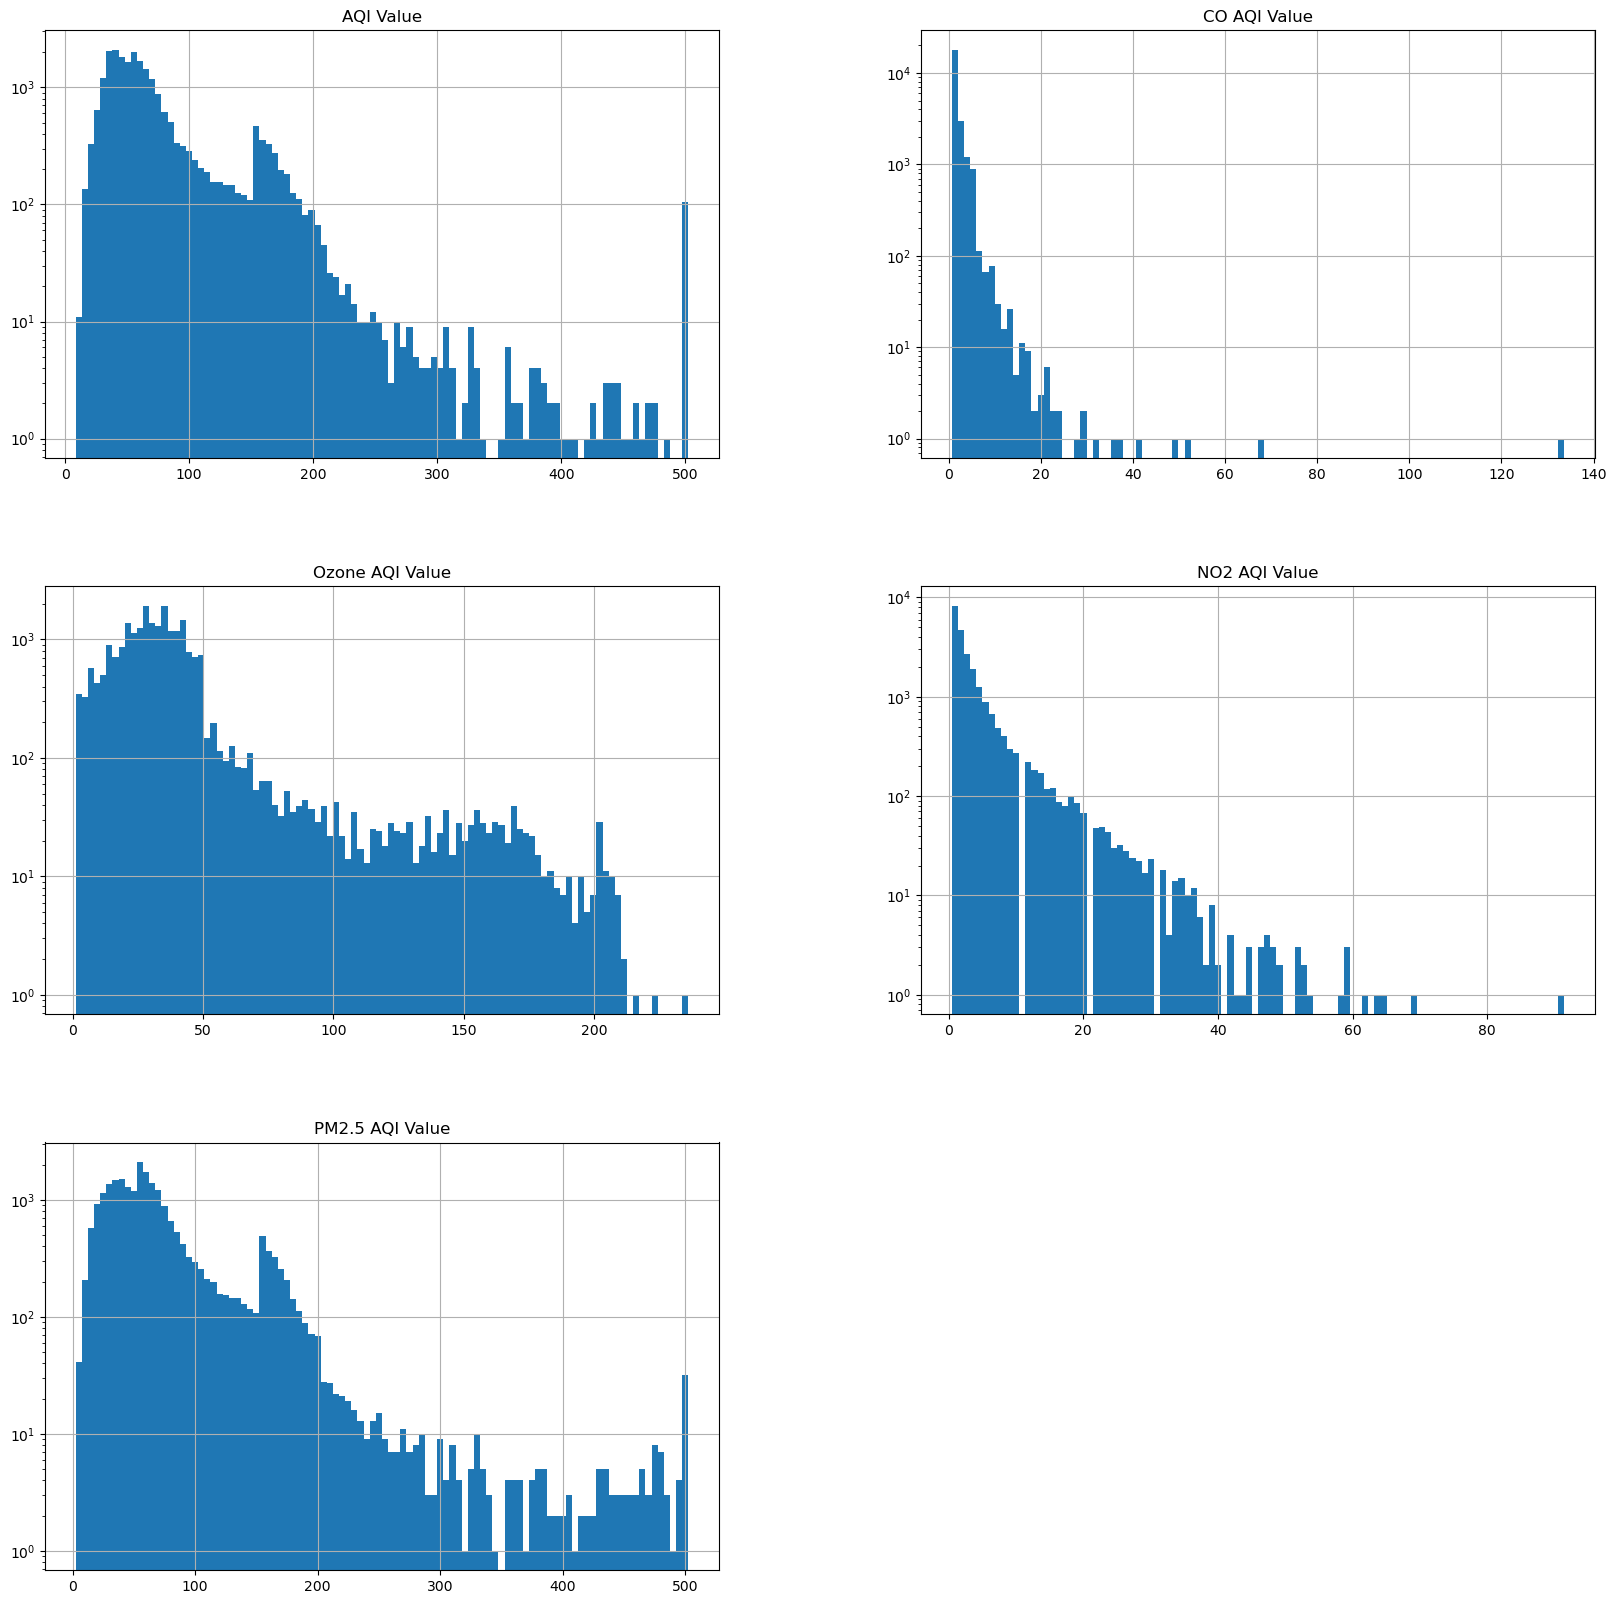

In [22]:
intdf.hist(figsize = (20,20),bins=100,align='right',log=1)
plt.ylim(0,200)
plt.xlim(0,200) 
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1269: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1277: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


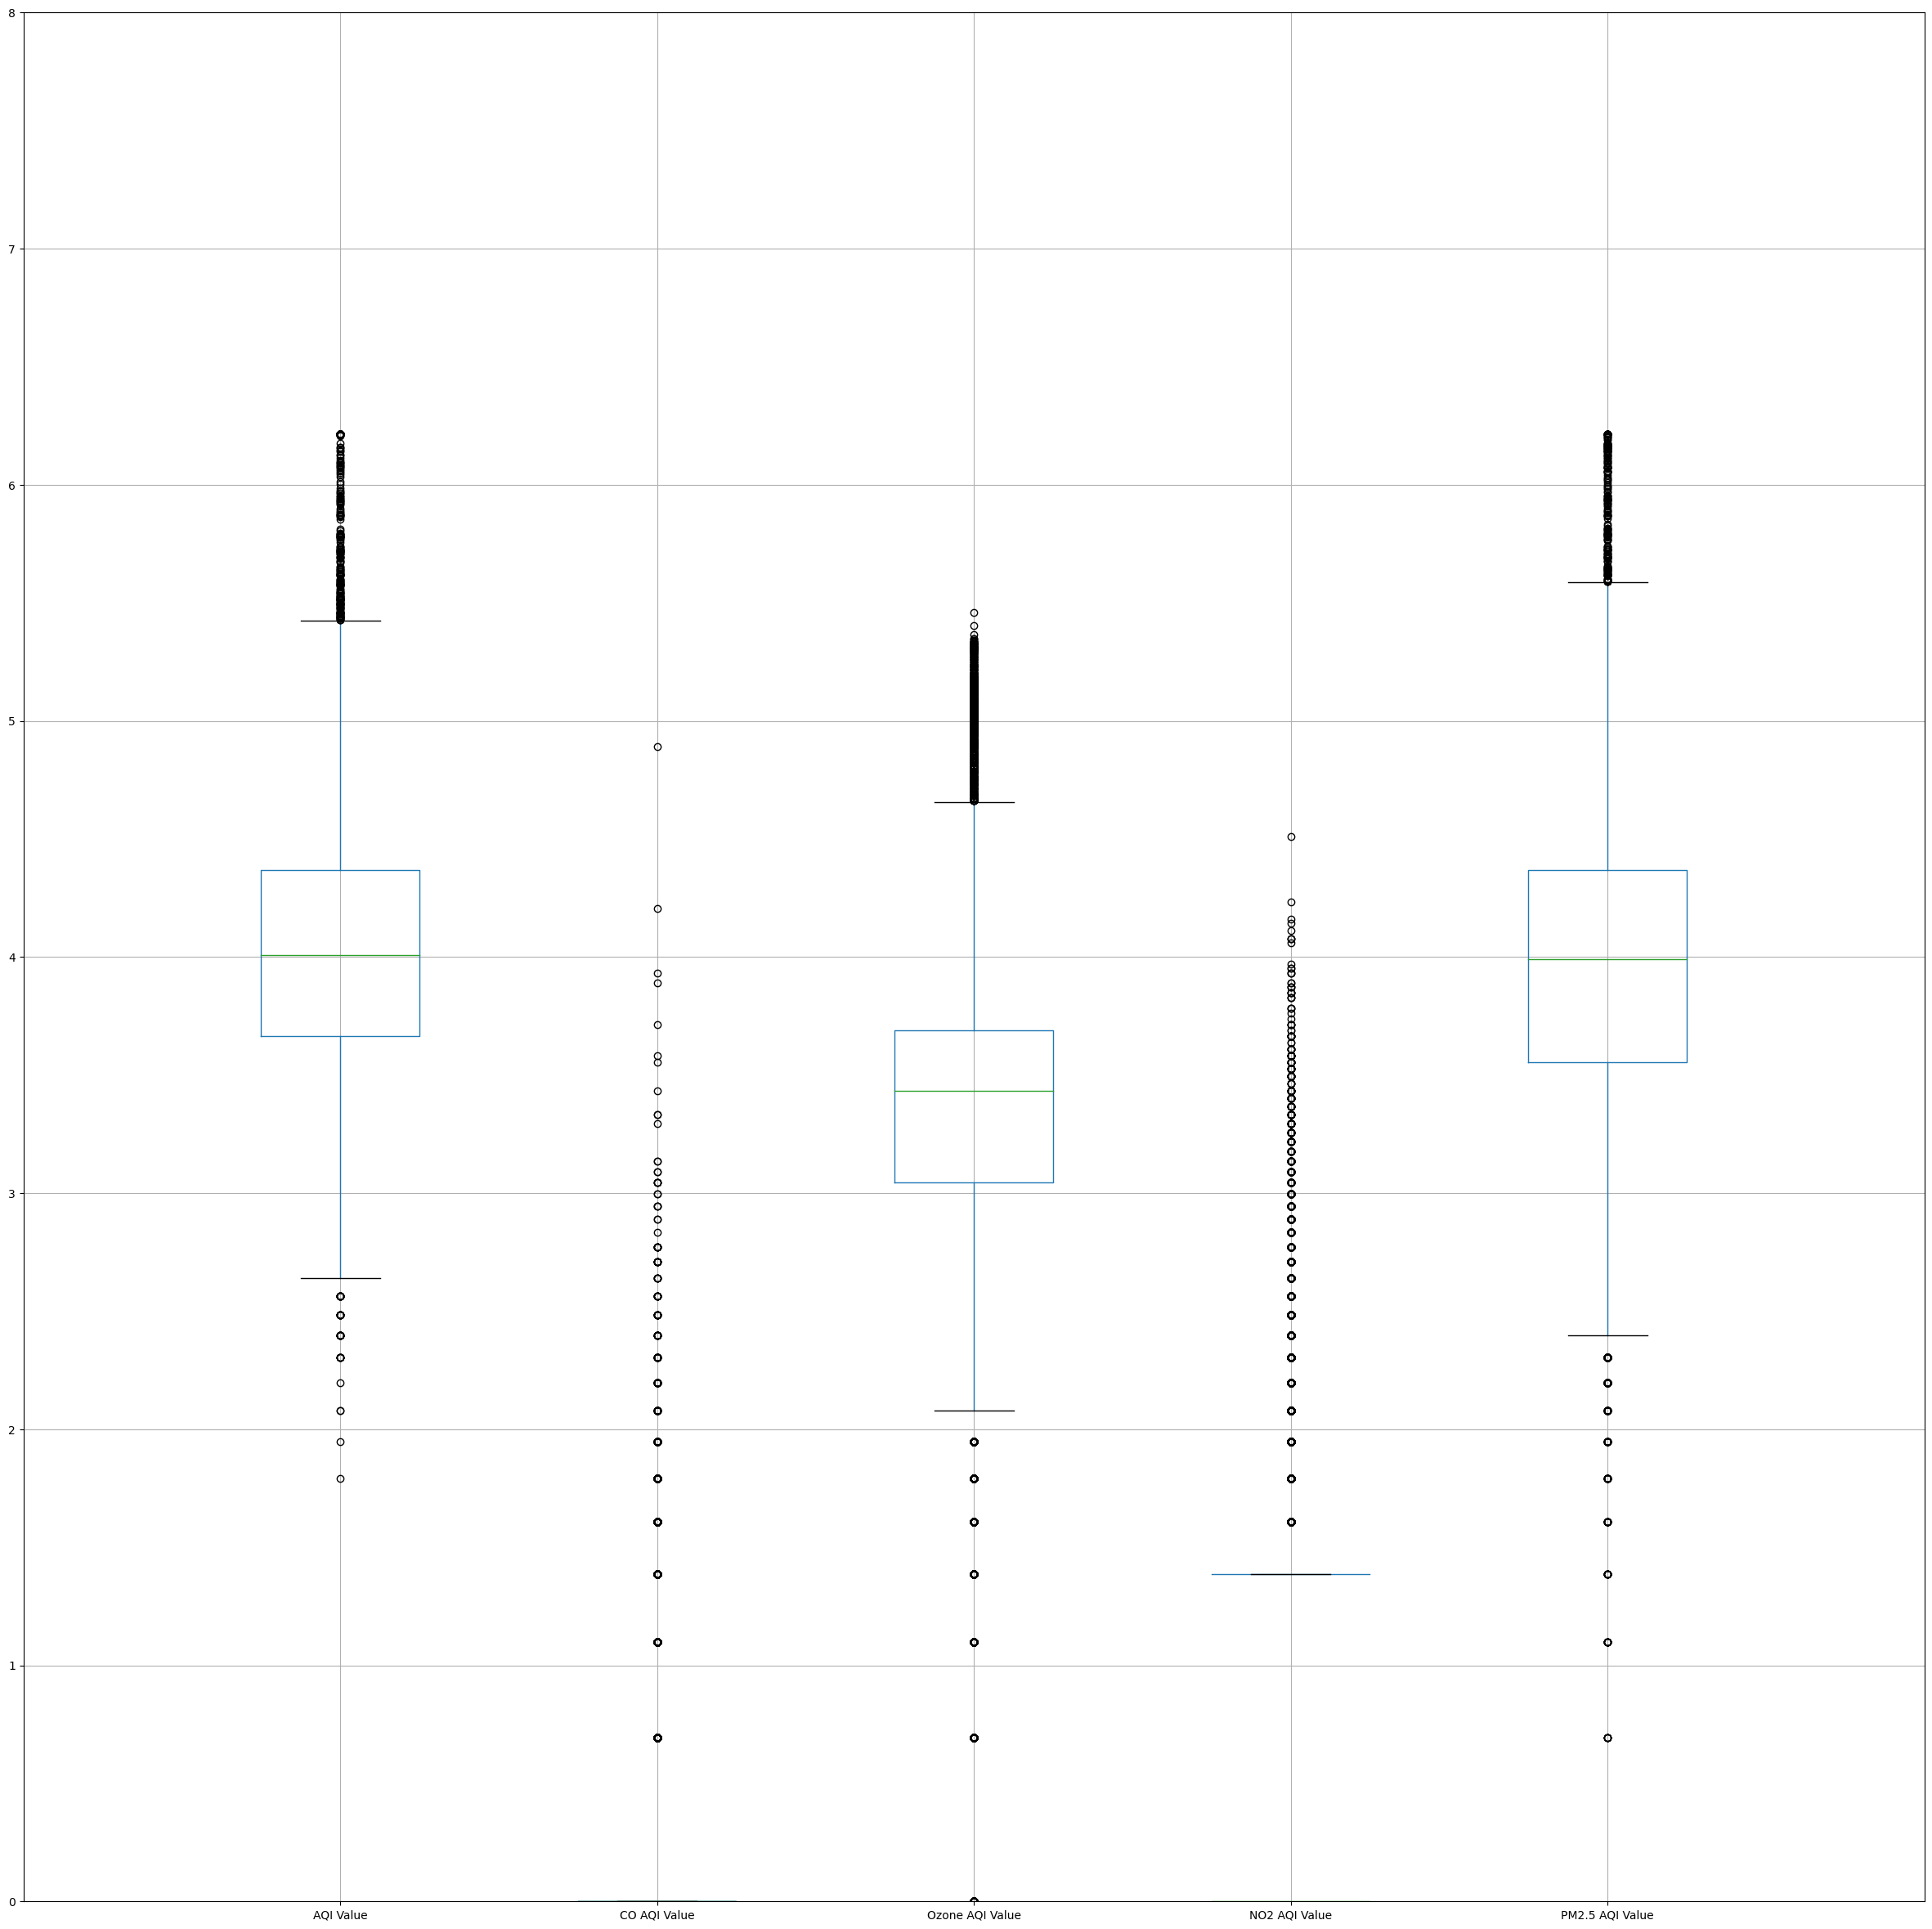

In [23]:
logdf=npy.log(intdf)
 
logdf.boxplot(figsize = (30,30))
plt.ylim(0,8)
plt.xlim(0,6)
plt.show()

In [24]:
del df['City']

In [25]:
aqi=df[['AQI Value']]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import DecisionTreeClassifier 

In [27]:
model= df.drop('AQI Value', axis = 1) 
model_train, model_test, modaqi_train, modaqi_test = train_test_split(model,aqi,  test_size=0.30, random_state=1471337788) 
scaler = StandardScaler()

ValueError: too many values to unpack (expected 2)

In [ ]:
mtrain_s=scaler.fit_transform(model_train.select_dtypes(exclude=['object']))
mtest_s=scaler.transform(model_test.select_dtypes(exclude=['object']))
maqitrain_s=scaler.fit_transform(modaqi_train.select_dtypes(exclude=['object']))
maqitest_s=scaler.transform(modaqi_test.select_dtypes(exclude=['object']))


mtrain_s = pd.DataFrame(data=mtrain_s , columns=["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"])
mtest_s = pd.DataFrame(data=mtest_s, columns=["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"])

In [ ]:
print(mtrain_s)

In [ ]:
print(mtest_s)


In [ ]:
onc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
mtrain_onc=model_train
onc.fit(mtrain_onc) 
mtrain_onc=onc.transform(mtrain_onc)
print(mtrain_onc)

In [ ]:
mtest_onc=model_test
mtest_onc=onc.transform(mtest_onc)
print(mtest_onc)

In [ ]:
mtest_o = pd.DataFrame(data=mtest_onc)
mtrain_o = pd.DataFrame(data=mtrain_onc)
mtrain_so=pd.concat([mtrain_s,mtrain_o], axis = 0)
mtest_so=pd.concat([mtest_s,mtest_o], axis = 0)
mtrain_so=mtrain_so.fillna(0).drop_duplicates ()
mtest_so=mtest_so.fillna(0).drop_duplicates ()

In [ ]:
 print(mtrain_so.head(100), '\n \n  ', mtest_so.head(100))

In [ ]:
hmodel_tr=model_train.select_dtypes(include=['float64', 'int64'])
hmodel_tr.hist(figsize = (20,20),bins=200,align='right', log=1 ,)

plt.ylim(0,1000)
plt.xlim(0,200) 

plt.show()



In [ ]:
smodel_tr=mtrain_s.select_dtypes(include=['float64', 'int64'])
smodel_tr.hist(figsize = (20,20),bins=200,align='right', log=1 ,)

plt.ylim(0,1000)
plt.xlim(0,200) 

plt.show()



In [ ]:
hmodel_ts=model_test.select_dtypes(include=['float64', 'int64'])
hmodel_ts.hist(figsize = (30,30),bins=200,align='right', log = 1)

plt.ylim(0,1000)
plt.xlim(0,200) 

plt.show()



In [ ]:
smodel_ts=mtest_s.select_dtypes(include=['float64', 'int64'])
smodel_ts.hist(figsize = (30,30),bins=200,align='right', log = 1)

plt.ylim(0,1000)
plt.xlim(0,200) 

plt.show()

NameError: name 'array' is not defined